# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./SinusRhythmLabels.png">

## Экстрасистолы
Пример:

<img src="./Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg200_samples.csv
* ecg208_samples.csv
* ecg231_samples.csv

Разметка комплексов представлена в файлах:
* ecg200_labels.csv
* ecg208 - разметки нет
* ecg231_labels.csv

Модель строится отдельно для каждого файла *samples.csv*

# Шаг 1 - Загрузка данных

см https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html

In [1]:
import pandas

ecg_200_data = pandas.read_csv('ecg_data/ecg200_samples.csv', sep='\t', header=None)
ecg_208_data = pandas.read_csv('ecg_data/ecg208_samples.csv', sep='\t', header=None)
ecg_231_data = pandas.read_csv('ecg_data/ecg231_samples.csv', sep='\t', header=None)

### Шаг 1.1(Опционально) - Подготовка данных (нормализация)

array / max(array), array - matrix row

# Шаг 2 - Загрузка разметки

In [44]:
ecg_200_labels = pandas.read_csv('ecg_data/ecg200_labels.csv', sep='\t', header=None)
ecg_231_labels = pandas.read_csv('ecg_data/ecg231_labels.csv', sep='\t', header=None)

def to_zeros(labels, symbol):
    labels_zeros = []
    for index, row in labels.iterrows():
        if (row[0] == symbol):
            labels_zeros.append(0)
        else:
            labels_zeros.append(1)
    return labels_zeros

# ecg_200_labels

# Шаг 3 - Кластеризация комплексов

см: 
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
* http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [3]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

kmeans_00 = KMeans(n_clusters=2, random_state=0).fit(ecg_200_data)
kmeans_08 = KMeans(n_clusters=2, random_state=0).fit(ecg_208_data)
kmeans_31 = KMeans(n_clusters=2, random_state=0).fit(ecg_231_data)

agglo_clust_00 = AgglomerativeClustering().fit(ecg_200_data)
agglo_clust_08 = AgglomerativeClustering().fit(ecg_208_data)
agglo_clust_31 = AgglomerativeClustering().fit(ecg_231_data)

In [ ]:
# from sklearn.cluster import AgglomerativeClustering
# clustering = AgglomerativeClustering().fit(ecg_231_data)
# clustering.labels_
# for i in clustering.labels_:
#     print(i)

# Шаг 4 - Визуализация полученного разбиения:

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def printEcg(data, title):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)

    for i in np.arange(0, line_count):
        plt.plot(x, data.iloc[i])
    plt.title(title)
#     plt.show() 
    
# def print_ecgs(datas, titles):
#     for i in range(0, len(datas)):
#         plt.subplot(1, 3, i+1)
#         line_count = datas[i].shape[0]
#         row_count = datas[i].shape[1] 
        
#         x = np.arange(0, row_count)
        
#         for j in np.arange(0, line_count):
#             plt.plot(x, datas[i].iloc[j])
#         plt.title(titles)
#     plt.show()
    
    
def print_ecgs(datas, titles):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        printEcg(datas[i], titles[i])
    plt.show()
    
    
def print_predict(algo, data, title, algo_name):
    line_count = data.shape[0]
    row_count = data.shape[1]
    
    x = np.arange(0, row_count)
    y = algo.labels_
    for i in np.arange(0, line_count):
        if y[i] == 0:
            plt.plot(x, data.iloc[i], 'c')
        else:
            plt.plot(x, data.iloc[i], 'k')  
    plt.title(title + '_predict' + '_' + algo_name)
#     plt.show()
    
def print_predicts(algos, datas, titles, algo_name):
    plt.figure(figsize=(30, 5))
    for i in range(0, len(datas)):
        plt.subplot(1, 3, i+1)
        print_predict(algos[i], datas[i], titles[i], algo_name)
    plt.show()

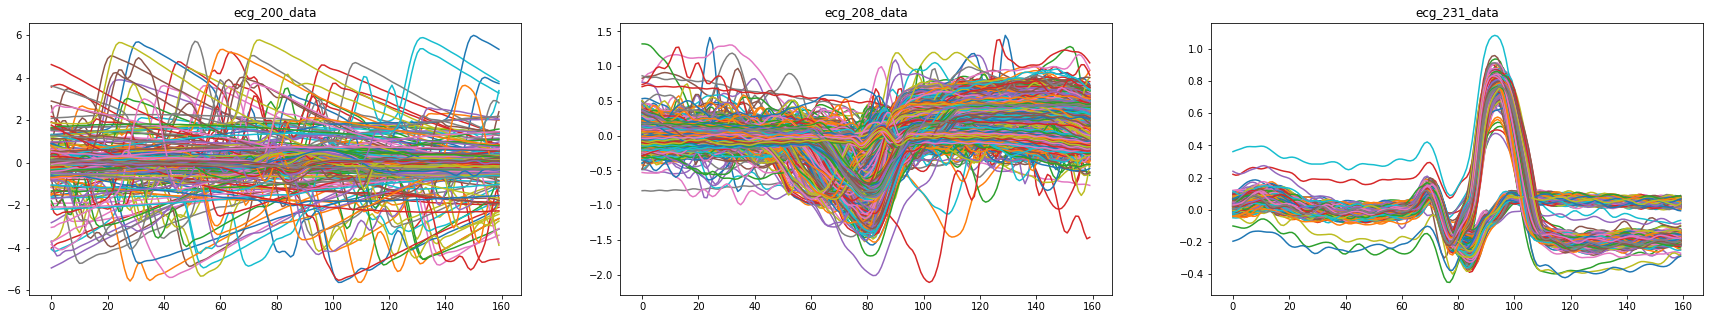

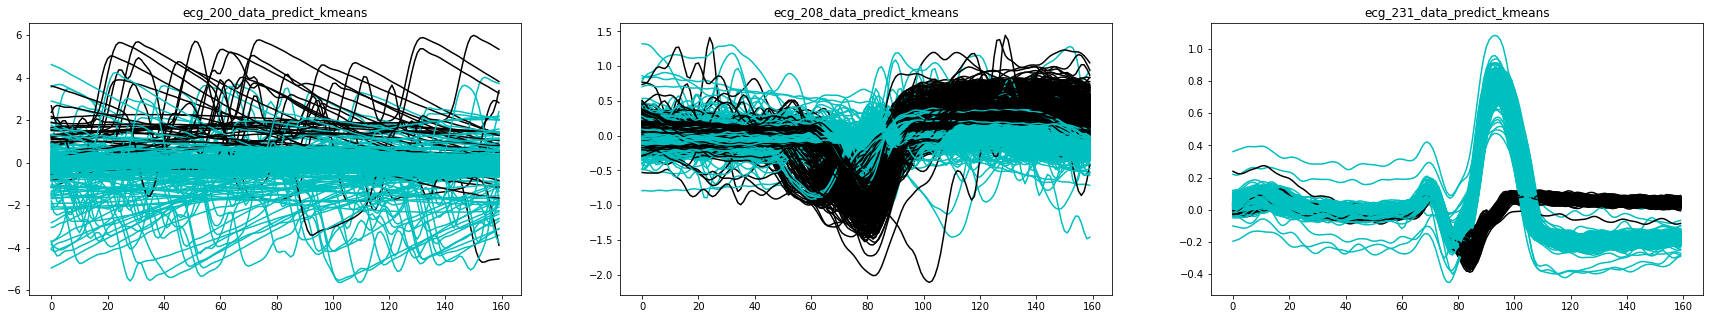

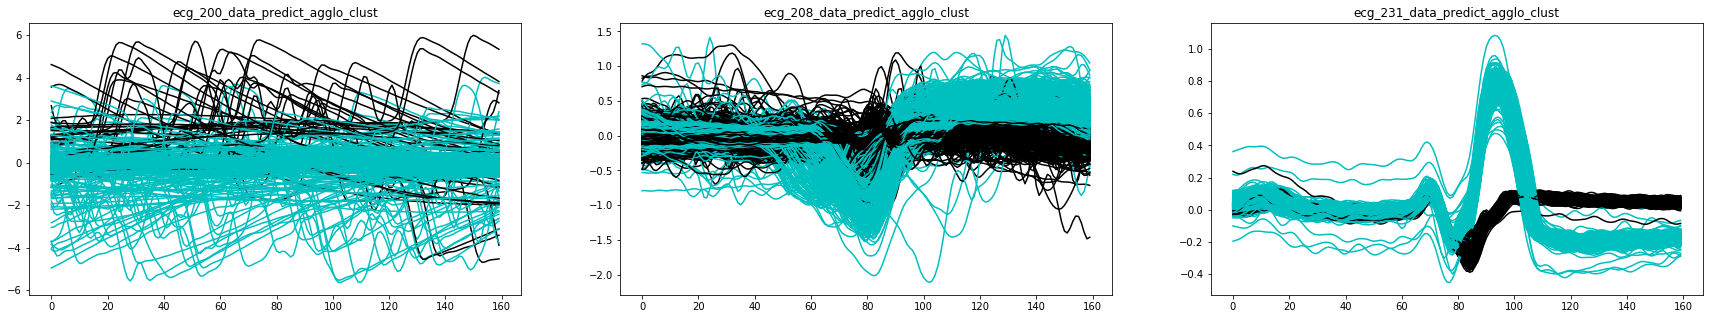

In [6]:
print_ecgs(
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data']
)
print_predicts(
    [kmeans_00, kmeans_08, kmeans_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'kmeans'
)
print_predicts(
    [agglo_clust_00, agglo_clust_08, agglo_clust_31], 
    [ecg_200_data, ecg_208_data, ecg_231_data], 
    ['ecg_200_data', 'ecg_208_data', 'ecg_231_data'], 'agglo_clust'
)

In [7]:
# printEcg(ecg_200_data, 'ecg_200_data')
# printEcg(ecg_208_data, 'ecg_208_data')
# printEcg(ecg_231_data, 'ecg_231_data')

In [8]:
# print_predict(kmeans_00, ecg_200_data, 'ecg_200_data', 'kmeans')
# print_predict(kmeans_08, ecg_208_data, 'ecg_208_data', 'kmeans')
# print_predict(kmeans_31, ecg_231_data, 'ecg_231_data', 'kmeans')

# print_predict(agglo_clust_00, ecg_200_data, 'ecg_200_data', 'agglo_clust')
# print_predict(agglo_clust_08, ecg_208_data, 'ecg_208_data', 'agglo_clust')
# print_predict(agglo_clust_31, ecg_231_data, 'ecg_231_data', 'agglo_clust')

# Шаг 5 - Оценка качества работы выбранных алгоритмов 

В записимости от исходных данных выбираем метрики.

см:
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html
* http://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg_kmeans_00 = silhouette_score(ecg_200_data, kmeans_00.labels_)
silhouette_avg_kmeans_08 = silhouette_score(ecg_208_data, kmeans_08.labels_)
silhouette_avg_kmeans_31 = silhouette_score(ecg_231_data, kmeans_31.labels_)

print('silhouette_avg_kmeans_00 = ', silhouette_avg_kmeans_00)
print('silhouette_avg_kmeans_08 = ', silhouette_avg_kmeans_08)
print('silhouette_avg_kmeans_31 = ', silhouette_avg_kmeans_31)

silhouette_avg_agglo_clust_00 = silhouette_score(ecg_200_data, agglo_clust_00.labels_)
silhouette_avg_agglo_clust_08 = silhouette_score(ecg_208_data, agglo_clust_08.labels_)
silhouette_avg_agglo_clust_31 = silhouette_score(ecg_231_data, agglo_clust_31.labels_)

print('silhouette_avg_agglo_clust_00 = ', silhouette_avg_agglo_clust_00)
print('silhouette_avg_agglo_clust_08 = ', silhouette_avg_agglo_clust_08)
print('silhouette_avg_agglo_clust_31 = ', silhouette_avg_agglo_clust_31)

silhouette_avg_kmeans_00 =  0.8650287599216048
silhouette_avg_kmeans_08 =  0.5790897482921714
silhouette_avg_kmeans_31 =  0.815673591390879
silhouette_avg_agglo_clust_00 =  0.8736991496529947
silhouette_avg_agglo_clust_08 =  0.5735292250015965
silhouette_avg_agglo_clust_31 =  0.815673591390879


In [55]:
from sklearn.metrics import homogeneity_score
ecg_231_labels_zeros = to_zeros(ecg_231_labels, 'V')
t =  homogeneity_score(ecg_231_labels_zeros, agglo_clust_31.labels_)
t

1.0

# Шаг 6 - Подбор параметров для алгоритмов кластеризации
- число кластеров
- функция расстояния
- и т.д.

# Шаг 7 - Оценка окончательного скора, выводы